### GROUP 12

In [1]:
import pandas as pd

#### Data Ingestion

In [2]:
# Load CSV into a DataFrame
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Data Preprocessing

In [5]:
# Check for null values
null = pd.DataFrame({'Null Values' : df.isnull().sum(), 'Percentage Null Values' : (df.isnull().sum()) / (df.shape[0]) * (100)})
null

Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.003350
babies                                    0                0.000000
meal                                      0                0.000000
country                                 488                0.408744
market_segment                            0                0.000000
distribution_channel                      0                0.000000
is_repeated_guest                         0                0.000000
previous_cancellations                    0                0.000000
previous_bookings_not_canceled            0                0.000000
reserved_room_type                        0                0.000000
assigned_room_type                        0                0.000000
booking_changes                           0                0.000000
deposit_type                              0                0.000000
agent                                 16340               13.686238
company                              112593               94.306893
days_in_waiting_list                      0                0.000000
customer_type                             0                0.000000
adr                                       0                0.000000
required_car_parking_spaces               0                0.000000
total_of_special_requests                 0                0.000000
reservation_status                        0                0.000000
reservation_status_date                   0                0.000000

1. agent (16,340 missing values — ~13.7%)
Type: Categorical (ID for booking agent)

Suggested Handling: Fill with a new category, e.g., "No agent" or 0

Reason: These bookings likely came without an agent (e.g., direct booking). Retaining this distinction is useful for market analysis.

2. company (112,593 missing values — ~94.3%)
Type: Categorical (ID for corporate client)

Suggested Handling: Fill with a new category, e.g., "No company" or 0

Reason: Most bookings are not made by companies, so missing values represent valid, meaningful absence.

3. country (488 missing — ~0.41%)
Type: Categorical (guest origin country)

Suggested Handling: Fill with mode (most common country) or "Unknown"

Reason: It's a small proportion. Imputing with mode prevents loss of data and maintains dataset consistency.

4. children (4 missing — ~0.003%)
Type: Numerical

Suggested Handling: Fill with 0 or median

Reason: Very few missing values, likely due to data entry errors. Most bookings have 0 children, so 0 is a safe and interpretable imputation.

In [6]:
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['children'].fillna(0, inplace=True)

/tmp/ipykernel_9620/1941628747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0, inplace=True)
/tmp/ipykernel_9620/1941628747.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

A hotel booking with 0 adults, 0 children, and 0 babies is logically invalid - no guests are staying.

These rows likely represent:
- Data entry errors
- Placeholder/test records
- Corrupted records

Such rows don’t contribute meaningful information and could distort analyses (e.g., average stay durations, revenue per guest, etc.).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

In [9]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

### Data Visualisation

/tmp/ipykernel_9620/3742742519.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette=['#3498db', '#e74c3c'])


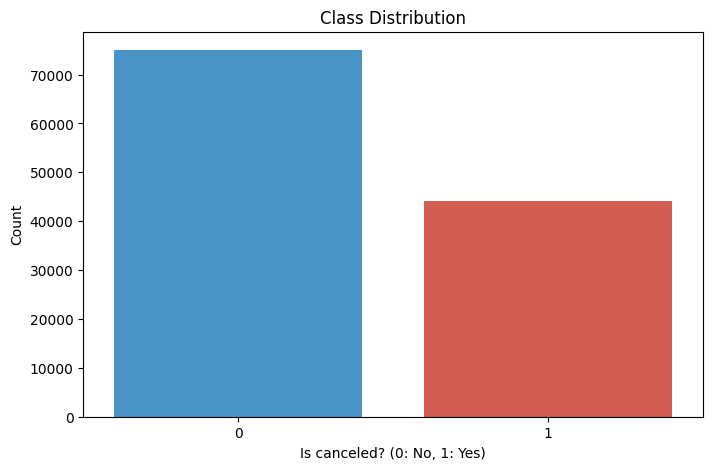

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x='is_canceled', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Class Distribution')
plt.xlabel('Is canceled? (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

#### Research Question 1: How does price per night vary over the year?

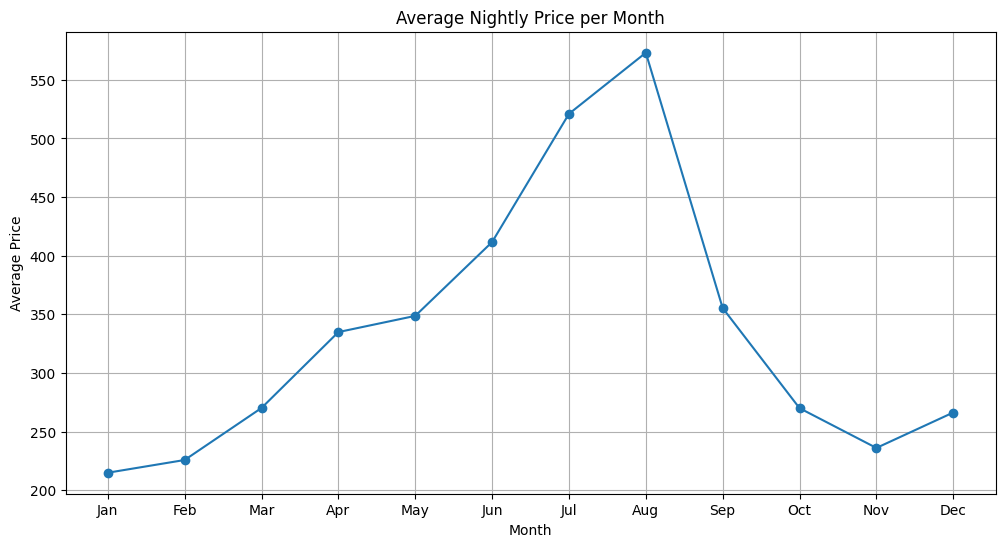

In [11]:
import matplotlib.pyplot as plt

# Line chart - MOnth vs Average Nightly Price
# This chart shows the average price per month, which can help identify trends over time
# Group by month and calculate average price
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month
df['arrival_date_year'] = pd.to_datetime(df['arrival_date_year'], format='%Y').dt.year
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-01')
df['price'] = df['adr'] * df['stays_in_weekend_nights'] + df['adr'] * df['stays_in_week_nights']
df['price'] = df['price'].astype(float)
df['price'] = df['price'].round(2)
df['price'].head()
# Group by month and calculate average price
avg_price_per_month = df.groupby('arrival_date_month')['price'].mean().reset_index()
# Plotting the average price per month
plt.figure(figsize=(12, 6))
plt.plot(avg_price_per_month['arrival_date_month'], avg_price_per_month['price'], marker='o')
plt.title('Average Nightly Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(avg_price_per_month['arrival_date_month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

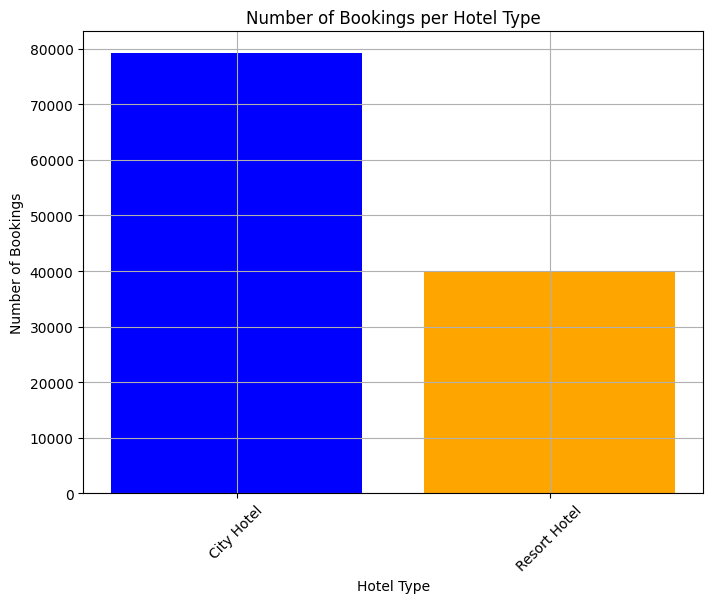

In [12]:
# Bar chart - Number of bookings per hotel type
# This chart shows the number of bookings for each hotel type, which can help identify which type is more popular
# Group by hotel type and count the number of bookings
bookings_per_hotel_type = df['hotel'].value_counts().reset_index()
# Rename columns
bookings_per_hotel_type.columns = ['hotel', 'number_of_bookings']
# Plotting the number of bookings per hotel type
plt.figure(figsize=(8, 6))
plt.bar(bookings_per_hotel_type['hotel'], bookings_per_hotel_type['number_of_bookings'], color=['blue', 'orange'])
plt.title('Number of Bookings per Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

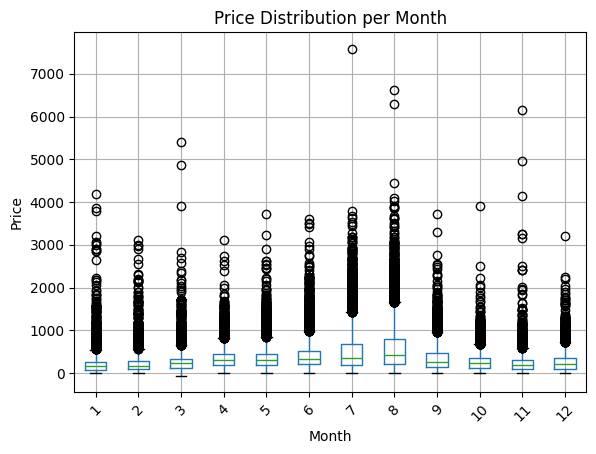

In [13]:
# Box plot -  Price distribution per month to show variability
# This chart shows the distribution of prices for each month, which can help identify outliers and variability
# Plotting the box plot
plt.figure(figsize=(12, 6))
df.boxplot(column='price', by='arrival_date_month', grid=False)
plt.title('Price Distribution per Month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid()
plt.show()

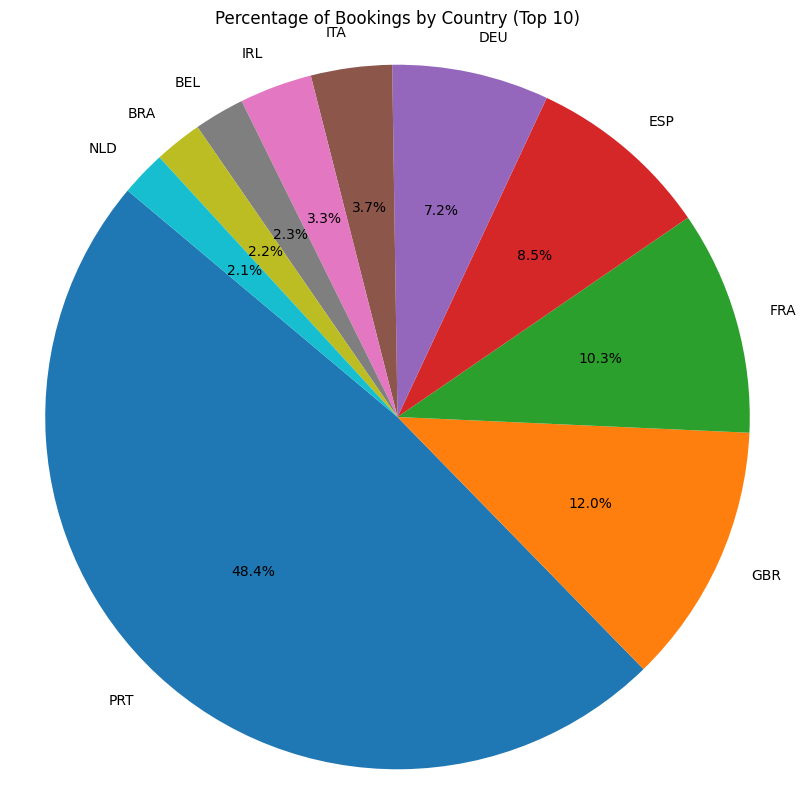

In [14]:
# Pie chart - Percentage of bookings by country
# This chart shows the percentage of bookings for each country, which can help identify the most popular countries
# Group by country and count the number of bookings
bookings_per_country = df['country'].value_counts().reset_index()
# Rename columns
bookings_per_country.columns = ['country', 'number_of_bookings']
# Select top 10 countries
top_10_countries = bookings_per_country.head(10)
# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_10_countries['number_of_bookings'], labels=top_10_countries['country'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Bookings by Country (Top 10)')
plt.axis('equal')
plt.show()


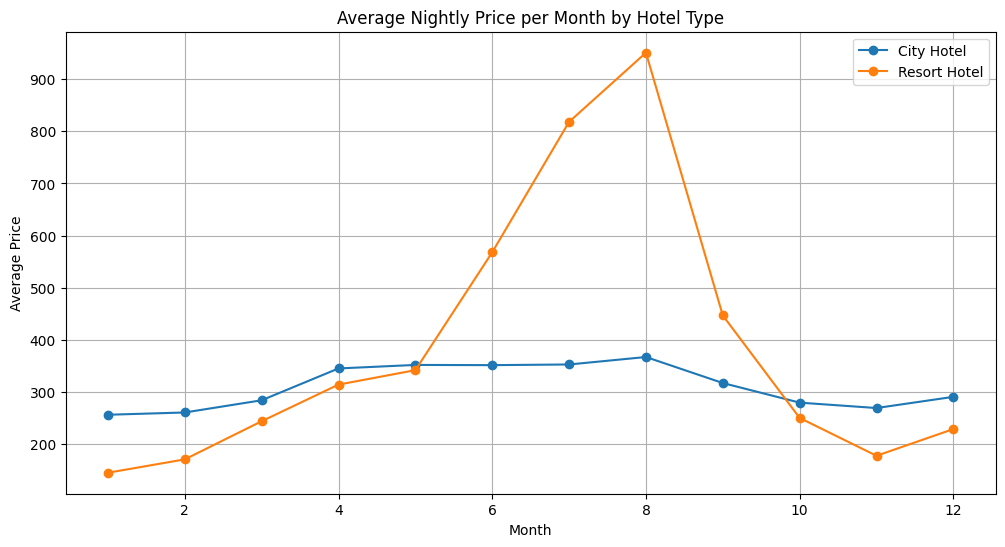

In [15]:
# Line chart split by hotel type - compares trends for different hotel categories
# This chart shows the average price per month for each hotel type, which can help identify trends for different hotel categories
# Group by month and hotel type and calculate average price
avg_price_per_month_hotel_type = df.groupby(['arrival_date_month', 'hotel'])['price'].mean().reset_index()
# Plotting the average price per month for each hotel type
plt.figure(figsize=(12, 6))
for hotel in avg_price_per_month_hotel_type['hotel'].unique():
    plt.plot(avg_price_per_month_hotel_type[avg_price_per_month_hotel_type['hotel'] == hotel]['arrival_date_month'],
             avg_price_per_month_hotel_type[avg_price_per_month_hotel_type['hotel'] == hotel]['price'],
             marker='o', label=hotel)
plt.title('Average Nightly Price per Month by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Average Price')
#plt.xticks(avg_price_per_month_hotel_type['arrival_date_month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid()
plt.show()



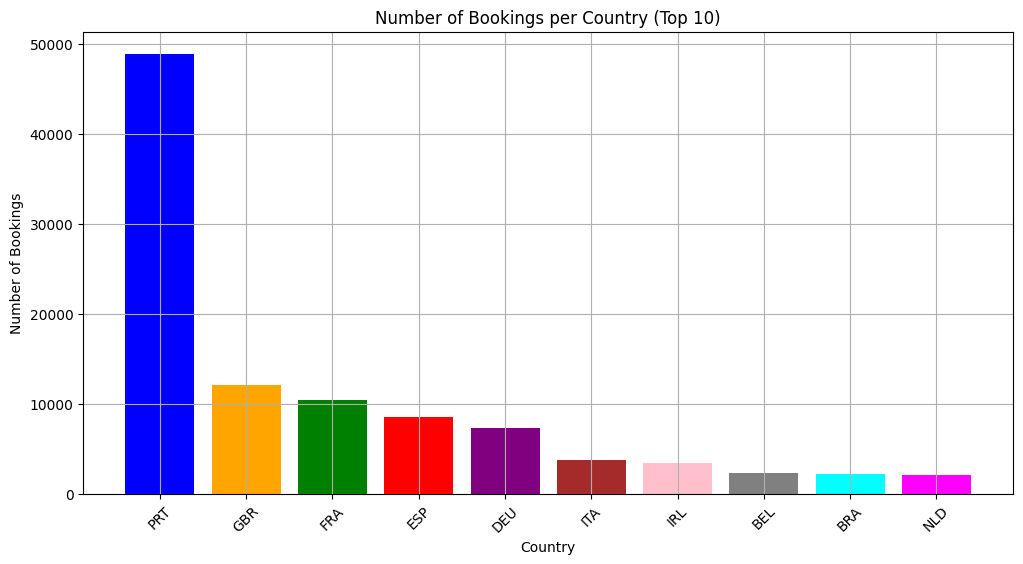

In [16]:
# Bar chart - Number of bookings per country
# This chart shows the number of bookings for each country, which can help identify the most popular countries
# Group by country and count the number of bookings
bookings_per_country = df['country'].value_counts().reset_index()
# Rename columns
bookings_per_country.columns = ['country', 'number_of_bookings']
# Select top 10 countries
top_10_countries = bookings_per_country.head(10)
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['country'], top_10_countries['number_of_bookings'], color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.title('Number of Bookings per Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Research Question 2: What are the most busy months?

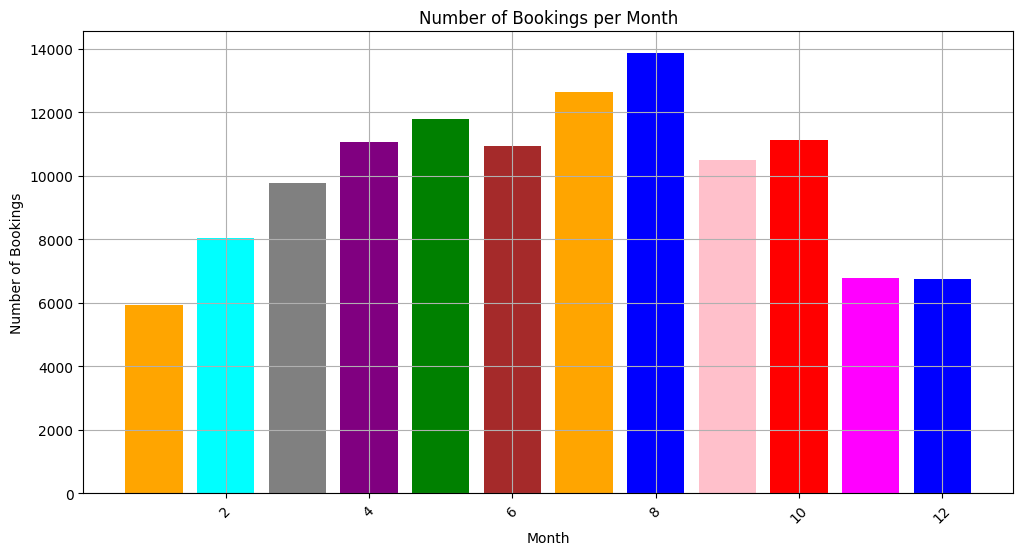

In [17]:
# Bar chart - Number of bookings per month
# This chart shows the number of bookings for each month, which can help identify trends over time
# Group by month and count the number of bookings
bookings_per_month = df['arrival_date_month'].value_counts().reset_index()
# Rename columns
bookings_per_month.columns = ['month', 'number_of_bookings']
# Plotting the number of bookings per month
plt.figure(figsize=(12, 6))
plt.bar(bookings_per_month['month'], bookings_per_month['number_of_bookings'], color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid()
plt.show()

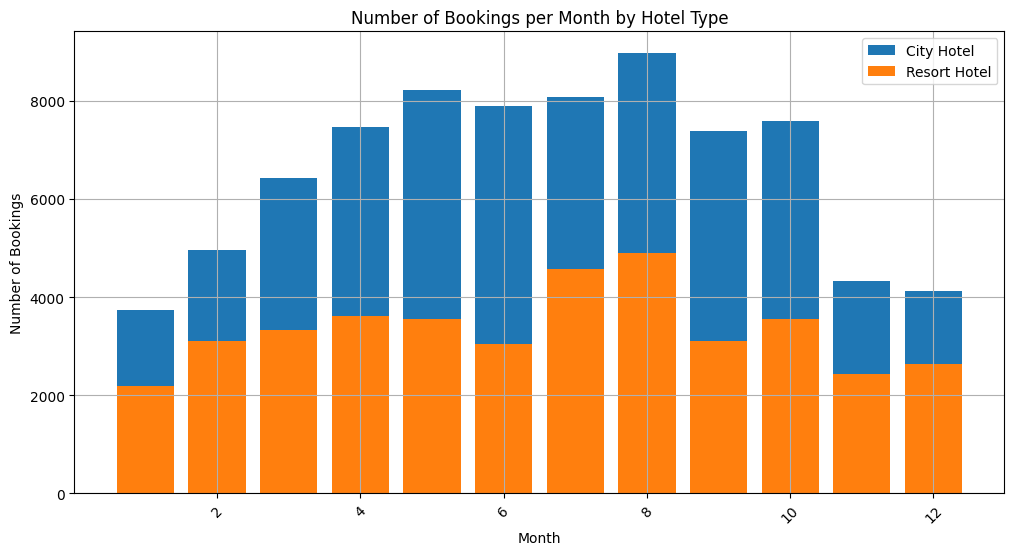

In [18]:
# Bar chart by hotel type - Compare busy months between resort and city hotels
# This chart shows the number of bookings for each month, split by hotel type, which can help identify busy months for each hotel type
# Group by month and hotel type and count the number of bookings
bookings_per_month_hotel_type = df.groupby(['arrival_date_month', 'hotel'])['hotel'].count().reset_index(name='number_of_bookings')
# Plotting the number of bookings per month for each hotel type
plt.figure(figsize=(12, 6))
for hotel in bookings_per_month_hotel_type['hotel'].unique():
    plt.bar(bookings_per_month_hotel_type[bookings_per_month_hotel_type['hotel'] == hotel]['arrival_date_month'],
            bookings_per_month_hotel_type[bookings_per_month_hotel_type['hotel'] == hotel]['number_of_bookings'],
            label=hotel)
plt.title('Number of Bookings per Month by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

#### Research Question 3: What are the variables that affect hotel reservation cancellation?

In [19]:
df2 = df.copy()

In [20]:
# Categorical columns to be converted to numerical
categorical_columns = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
# Convert categorical columns to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    df2[column] = label_encoder.fit_transform(df2[column].astype(str))
# Check the first few rows of the DataFrame after encoding
df2.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342               2015                   7   
1      1            0        737               2015                   7   
2      1            0          7               2015                   7   
3      1            0         13               2015                   7   
4      1            0         14               2015                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  company  \
0                        0                     0       2  ...      0.0   
1                        0                     0       2  ...      0.0   
2                        0                     1       1  ...      0.0   
3                        0                     1       1  ...      0.0   
4                        0                     2       2  ...      0.0   

   days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                     0              2   0.0                            0   
1                     0              2   0.0                            0   
2                     0              2  75.0                            0   
3                     0              2  75.0                            0   
4                     0              2  98.0                            0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0                   1               2015-07-01   
1                          0                   1               2015-07-01   
2                          0                   1               2015-07-02   
3                          0                   1               2015-07-02   
4                          1                   1               2015-07-03   

   arrival_date  price  
0    2015-07-01    0.0  
1    2015-07-01    0.0  
2    2015-07-01   75.0  
3    2015-07-01   75.0  
4    2015-07-01  196.0  

[5 rows x 34 columns]

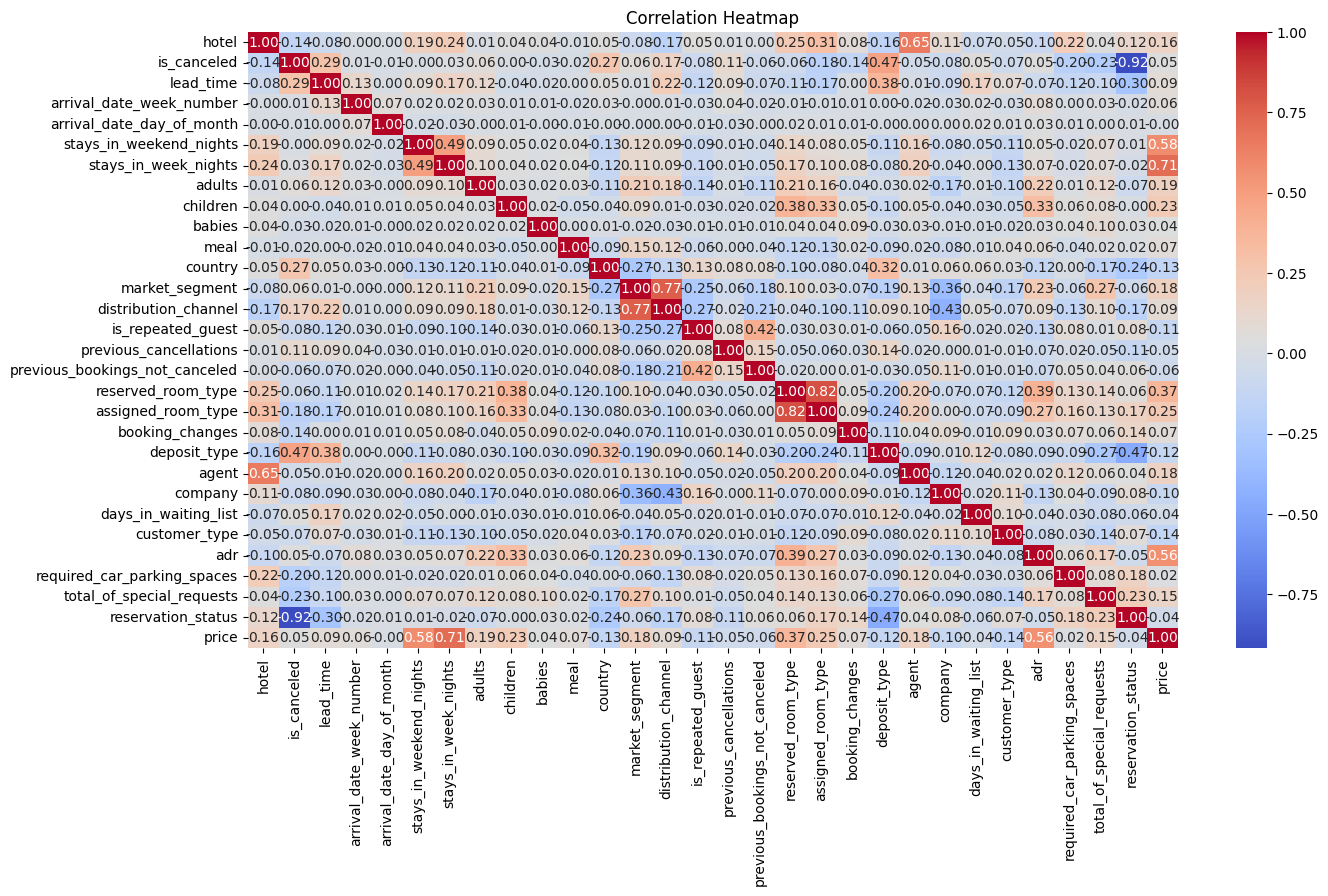

In [21]:
# Correlation heatmap - to explore relationships between variables and cancellations
# This chart shows the correlation between different variables, which can help identify relationships
import seaborn as sns

# selecting only numerical columns for correlation analysis
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns
# Calculate the correlation matrix
plt.figure(figsize=(15, 8))
correlation_matrix = df2[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Print the correlation values with cancellations
correlation_with_cancellations = correlation_matrix['is_canceled'].sort_values(ascending=False)
print(correlation_with_cancellations)
# Correlation with cancellations

# Identify weak correlations
weak_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) < 0.3 and col1 != col2:  # Threshold for "weak" correlation
            weak_correlations.append((col1, col2, corr_value))


print(f"\nNumber of weak correlations (|r| < 0.3): {len(weak_correlations)}")
print(f"Percentage of weak correlations: {len(weak_correlations) / (len(correlation_matrix.columns) * (len(correlation_matrix.columns) - 1) / 2):.1%}")


is_canceled                       1.000000
deposit_type                      0.468676
lead_time                         0.292876
country                           0.268057
distribution_channel              0.167707
previous_cancellations            0.110139
market_segment                    0.059419
adults                            0.058182
days_in_waiting_list              0.054301
adr                               0.046492
price                             0.046031
stays_in_week_nights              0.025542
arrival_date_week_number          0.008315
children                          0.004851
stays_in_weekend_nights          -0.001323
arrival_date_day_of_month        -0.005948
meal                             -0.017227
babies                           -0.032569
agent                            -0.046770
previous_bookings_not_canceled   -0.057365
reserved_room_type               -0.062216
customer_type                    -0.068206
company                          -0.083594
is_repeated

<Figure size 1200x600 with 0 Axes>

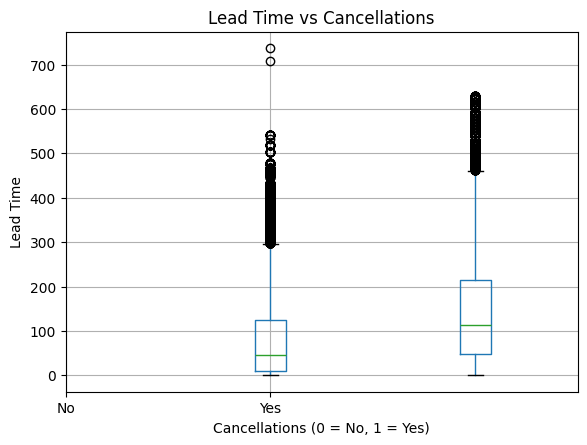

In [23]:
# Box plot - lead time vs cancellations, do early bookings cancel more?
# This chart shows the distribution of lead time for canceled and non-canceled bookings, which can help identify trends
# Plotting the box plot
plt.figure(figsize=(12, 6))
df.boxplot(column='lead_time', by='is_canceled', grid=False)
plt.title('Lead Time vs Cancellations')
plt.suptitle('')
plt.xlabel('Cancellations (0 = No, 1 = Yes)')
plt.ylabel('Lead Time')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid()
plt.show()

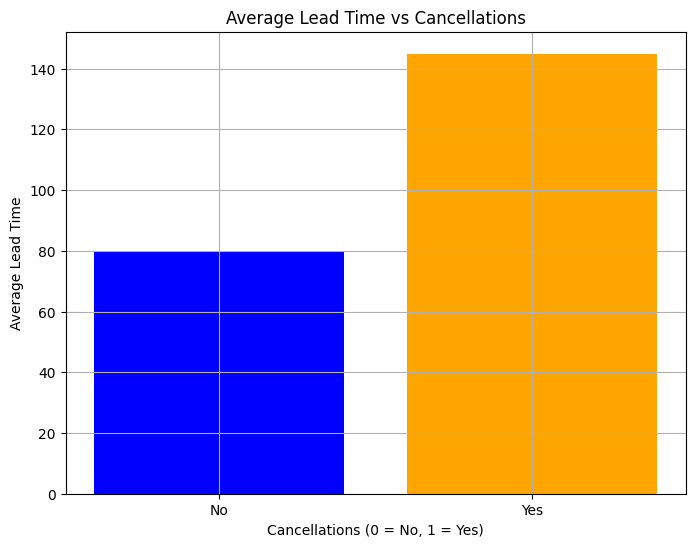

In [24]:
# Bar chart - lead time vs cancellations
# This chart shows the average lead time for canceled and non-canceled bookings, which can help identify trends
# Group by cancellation status and calculate average lead time
avg_lead_time_per_cancellation = df.groupby('is_canceled')['lead_time'].mean().reset_index()
# Plotting the average lead time for canceled and non-canceled bookings
plt.figure(figsize=(8, 6))
plt.bar(avg_lead_time_per_cancellation['is_canceled'], avg_lead_time_per_cancellation['lead_time'], color=['blue', 'orange'])
plt.title('Average Lead Time vs Cancellations')
plt.xlabel('Cancellations (0 = No, 1 = Yes)')
plt.ylabel('Average Lead Time')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid()
plt.show()

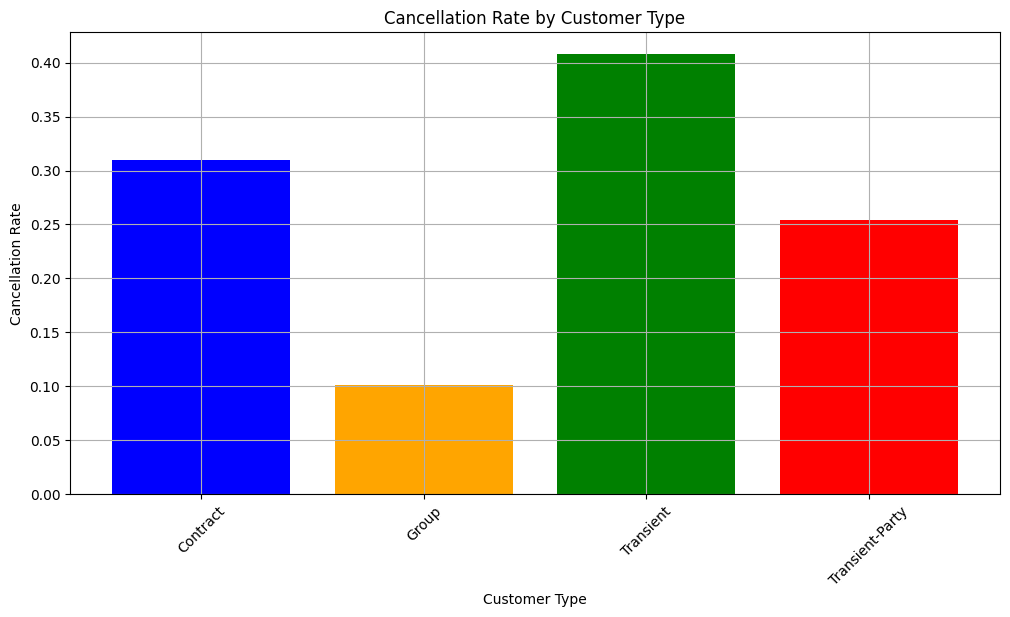

In [25]:
# Bar chart - Cancellation rate by customer type
# This chart shows the cancellation rate for each customer type, which can help identify trends
# Group by customer type and calculate cancellation rate
cancellation_rate_per_customer_type = df.groupby('customer_type')['is_canceled'].mean().reset_index()
# Plotting the cancellation rate for each customer type
plt.figure(figsize=(12, 6))
plt.bar(cancellation_rate_per_customer_type['customer_type'], cancellation_rate_per_customer_type['is_canceled'], color=['blue', 'orange', 'green', 'red'])
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

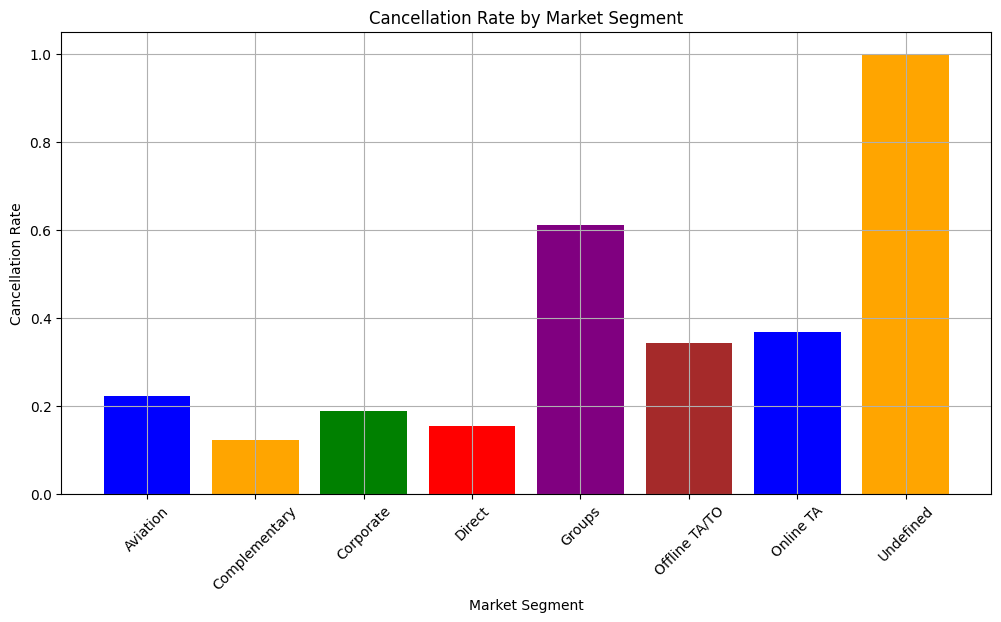

In [26]:
# Bar chart - Cancellation rate by market segment
# This chart shows the cancellation rate for each market segment, which can help identify trends
# Group by market segment and calculate cancellation rate
cancellation_rate_per_market_segment = df.groupby('market_segment')['is_canceled'].mean().reset_index()
# Plotting the cancellation rate for each market segment
plt.figure(figsize=(12, 6))
plt.bar(cancellation_rate_per_market_segment['market_segment'], cancellation_rate_per_market_segment['is_canceled'], color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Research Question 4: Bookings by market segment

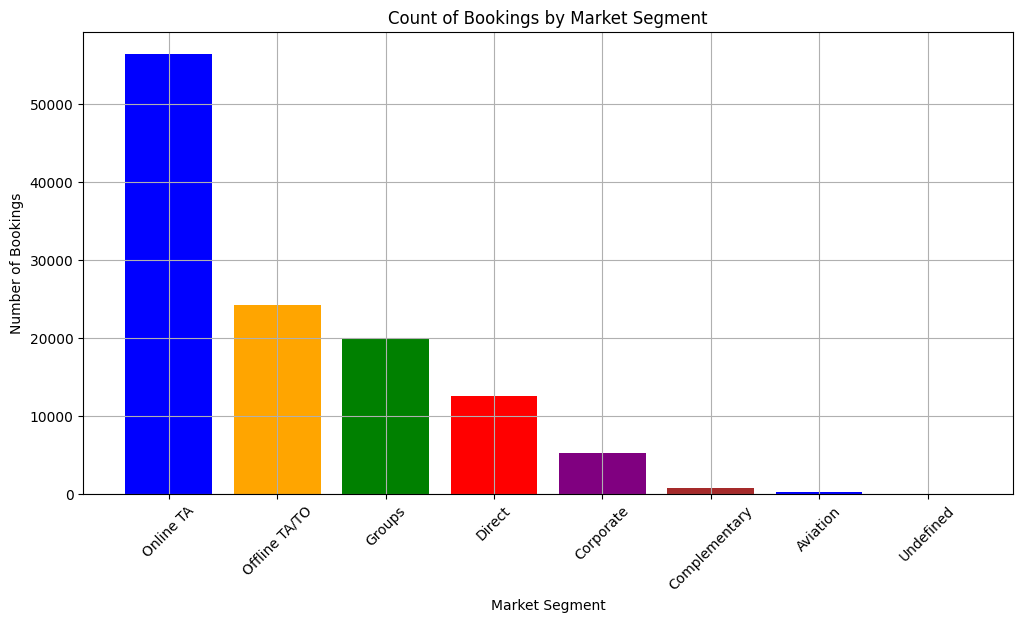

In [27]:
# Bar chart - Count of bookings by segment
# This chart shows the count of bookings for each market segment, which can help identify trends
# Group by market segment and count the number of bookings
bookings_per_market_segment = df['market_segment'].value_counts().reset_index()
# Rename columns
bookings_per_market_segment.columns = ['market_segment', 'number_of_bookings']
# Plotting the count of bookings for each market segment
plt.figure(figsize=(12, 6))
plt.bar(bookings_per_market_segment['market_segment'], bookings_per_market_segment['number_of_bookings'], color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Count of Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid()
plt.show()

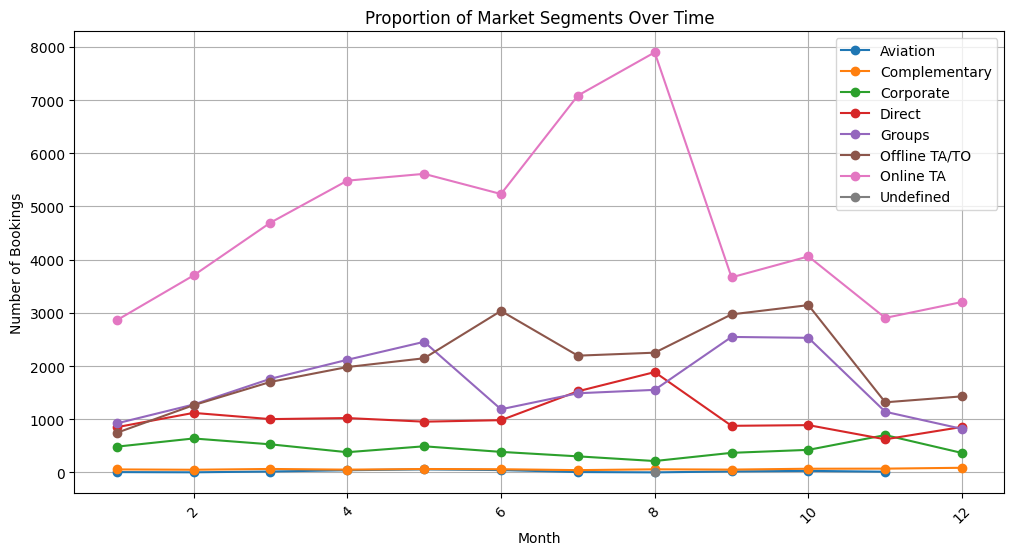

In [28]:
# Time series - how market segment proportions change over time
# This chart shows the proportion of each market segment over time, which can help identify trends
# Group by month and market segment and count the number of bookings
bookings_per_month_market_segment = df.groupby(['arrival_date_month', 'market_segment'])['hotel'].count().reset_index(name='number_of_bookings')
# Plotting the proportion of each market segment over time
plt.figure(figsize=(12, 6))
for segment in bookings_per_month_market_segment['market_segment'].unique():
    plt.plot(bookings_per_month_market_segment[bookings_per_month_market_segment['market_segment'] == segment]['arrival_date_month'],
             bookings_per_month_market_segment[bookings_per_month_market_segment['market_segment'] == segment]['number_of_bookings'],
             marker='o', label=segment)
plt.title('Proportion of Market Segments Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

#### Research Question 5: How long do people stay at the hotels?

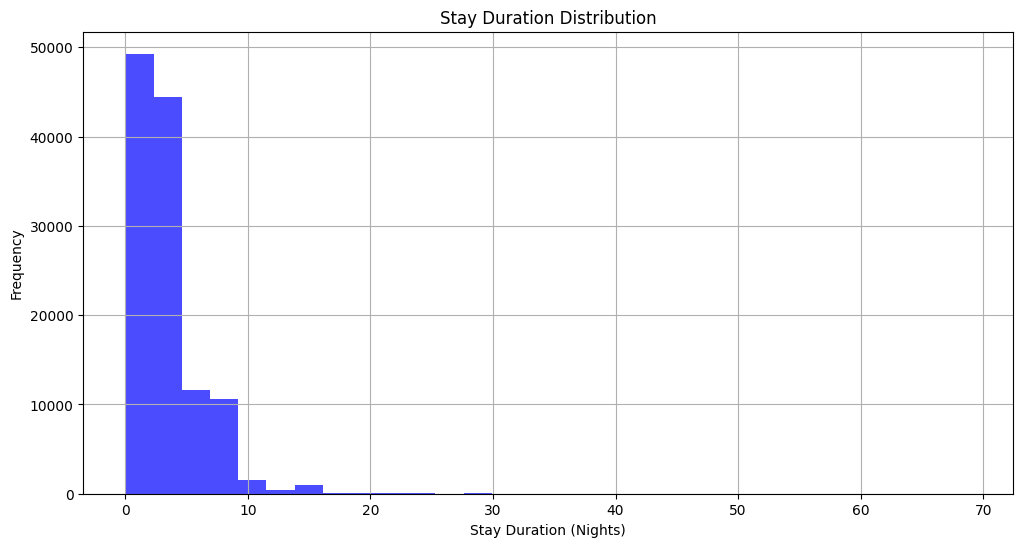

In [29]:
# Histogram - stay duration distribution
# This chart shows the distribution of stay duration, which can help identify trends
# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(df['stays_in_week_nights'] + df['stays_in_weekend_nights'], bins=30, color='blue', alpha=0.7)
plt.title('Stay Duration Distribution')
plt.xlabel('Stay Duration (Nights)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

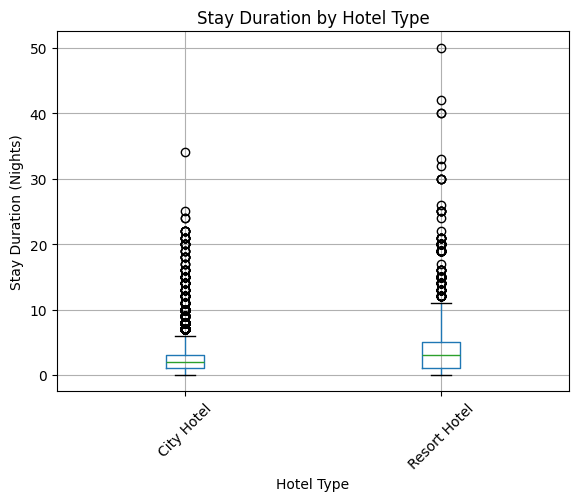

In [30]:
# Box plot - stay duration by hotel type
# This chart shows the distribution of stay duration for each hotel type, which can help identify trends
# Plotting the box plot
plt.figure(figsize=(12, 6))
df.boxplot(column='stays_in_week_nights', by='hotel', grid=False)
plt.title('Stay Duration by Hotel Type')
plt.suptitle('')
plt.xlabel('Hotel Type')
plt.ylabel('Stay Duration (Nights)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

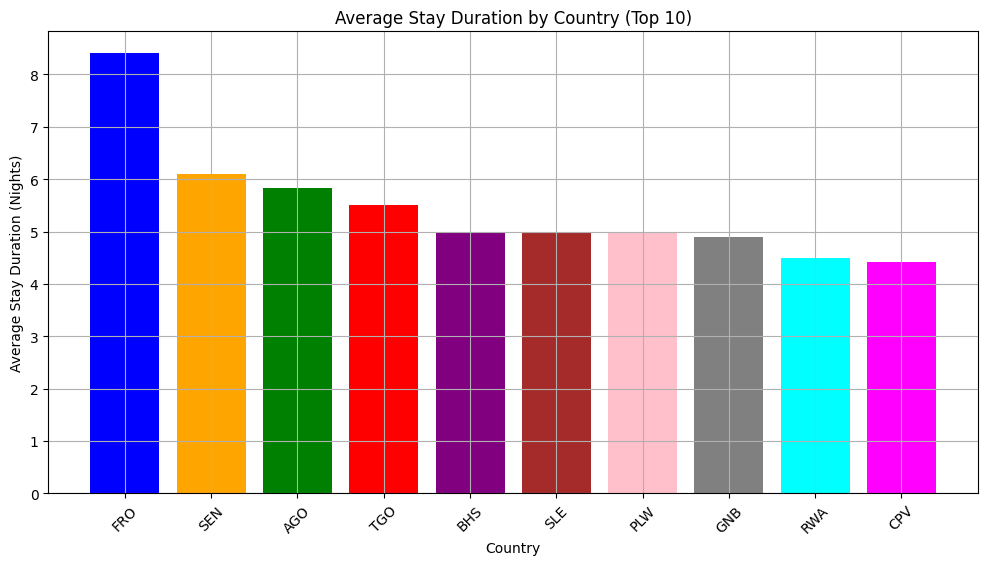

In [31]:
# Bar plot - average stay duration by country
# This chart shows the average stay duration for each country, which can help identify trends
# Group by country and calculate average stay duration
avg_stay_duration_per_country = df.groupby('country')['stays_in_week_nights'].mean().reset_index()
# Rename columns
avg_stay_duration_per_country.columns = ['country', 'average_stay_duration']
# Select top 10 countries
top_10_countries = avg_stay_duration_per_country.sort_values(by='average_stay_duration', ascending=False).head(10)
# Plotting the average stay duration for each country
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['country'], top_10_countries['average_stay_duration'], color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.title('Average Stay Duration by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Stay Duration (Nights)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Model Selection

In [32]:
df2.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342               2015                   7   
1      1            0        737               2015                   7   
2      1            0          7               2015                   7   
3      1            0         13               2015                   7   
4      1            0         14               2015                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  company  \
0                        0                     0       2  ...      0.0   
1                        0                     0       2  ...      0.0   
2                        0                     1       1  ...      0.0   
3                        0                     1       1  ...      0.0   
4                        0                     2       2  ...      0.0   

   days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                     0              2   0.0                            0   
1                     0              2   0.0                            0   
2                     0              2  75.0                            0   
3                     0              2  75.0                            0   
4                     0              2  98.0                            0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0                   1               2015-07-01   
1                          0                   1               2015-07-01   
2                          0                   1               2015-07-02   
3                          0                   1               2015-07-02   
4                          1                   1               2015-07-03   

   arrival_date  price  
0    2015-07-01    0.0  
1    2015-07-01    0.0  
2    2015-07-01   75.0  
3    2015-07-01   75.0  
4    2015-07-01  196.0  

[5 rows x 34 columns]

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  int64         
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int32         
 4   arrival_date_month              119210 non-null  int32         
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119210 non-null  float64     

In [34]:
columns = df2.columns
for i in columns:
    print(i)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date
arrival_date
price


In [35]:
cols_to_drop = ['days_in_waiting_list', 'price', 'arrival_date_year',
               'arrival_date_month', 'arrival_date', 'assigned_room_type',
               'booking_changes', 'reservation_status', 'country',
               'arrival_date_week_number', 'arrival_date_day_of_month']

df2.drop(cols_to_drop, axis = 1, inplace = True)

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  int64  
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   stays_in_weekend_nights         119210 non-null  int64  
 4   stays_in_week_nights            119210 non-null  int64  
 5   adults                          119210 non-null  int64  
 6   children                        119210 non-null  float64
 7   babies                          119210 non-null  int64  
 8   meal                            119210 non-null  int64  
 9   market_segment                  119210 non-null  int64  
 10  distribution_channel            119210 non-null  int64  
 11  is_repeated_guest               119210 non-null  int64  
 12  previous_cancellation

In [37]:
df2['reservation_status_date'] = pd.to_datetime(df2['reservation_status_date'])

df2['year'] = df2['reservation_status_date'].dt.year
df2['month'] = df2['reservation_status_date'].dt.month
df2['day'] = df2['reservation_status_date'].dt.day
df2.drop(['reservation_status_date'] , axis = 1, inplace = True)

df2.head()

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
0      1            0        342                        0   
1      1            0        737                        0   
2      1            0          7                        0   
3      1            0         13                        0   
4      1            0         14                        0   

   stays_in_week_nights  adults  children  babies  meal  market_segment  ...  \
0                     0       2       0.0       0     0               3  ...   
1                     0       2       0.0       0     0               3  ...   
2                     1       1       0.0       0     0               3  ...   
3                     1       1       0.0       0     0               2  ...   
4                     2       2       0.0       0     0               6  ...   

   deposit_type  agent  company  customer_type   adr  \
0             0    0.0      0.0              2   0.0   
1             0    0.0      0.0              2   0.0   
2             0    0.0      0.0              2  75.0   
3             0  304.0      0.0              2  75.0   
4             0  240.0      0.0              2  98.0   

   required_car_parking_spaces  total_of_special_requests  year  month  day  
0                            0                          0  2015      7    1  
1                            0                          0  2015      7    1  
2                            0                          0  2015      7    2  
3                            0                          0  2015      7    2  
4                            0                          1  2015      7    3  

[5 rows x 25 columns]

In [38]:
df2.head(2)

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
0      1            0        342                        0   
1      1            0        737                        0   

   stays_in_week_nights  adults  children  babies  meal  market_segment  ...  \
0                     0       2       0.0       0     0               3  ...   
1                     0       2       0.0       0     0               3  ...   

   deposit_type  agent  company  customer_type  adr  \
0             0    0.0      0.0              2  0.0   
1             0    0.0      0.0              2  0.0   

   required_car_parking_spaces  total_of_special_requests  year  month  day  
0                            0                          0  2015      7    1  
1                            0                          0  2015      7    1  

[2 rows x 25 columns]

### Model Selection

In [39]:
# Features and labels
features = df2.drop('is_canceled', axis=1)
label = df2.loc[:, 'is_canceled']

In [40]:
from sklearn.model_selection import train_test_split

# splitting data into training set and test set
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size = 0.30)

In [41]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

rf_clf = RandomForestClassifier()
rf_clf.fit(features_train, label_train)

y_pred_rf_clf = rf_clf.predict(features_test)

f1_score_rf = f1_score(label_test, y_pred_rf_clf)
acc_rf_clf = accuracy_score(label_test, y_pred_rf_clf)
conf = confusion_matrix(label_test, y_pred_rf_clf)
clf_report = classification_report(label_test, y_pred_rf_clf)

print(f"F1 Score of RandomForest Classifier: {f1_score_rf}")
print(f"Accuracy Score of Random Forest is : {acc_rf_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

F1 Score of RandomForest Classifier: 0.8680851063829788
Accuracy Score of Random Forest is : 0.9081173279646562
Confusion Matrix : 
[[21665   764]
 [ 2522 10812]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     22429
           1       0.93      0.81      0.87     13334

    accuracy                           0.91     35763
   macro avg       0.91      0.89      0.90     35763
weighted avg       0.91      0.91      0.91     35763



In [42]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(features_train, label_train)

y_pred_lr = lr.predict(features_test)

f1_score_lr = f1_score(label_test, y_pred_lr)
acc_lr = accuracy_score(label_test, y_pred_lr)
conf = confusion_matrix(label_test, y_pred_lr)
clf_report = classification_report(label_test, y_pred_lr)

print(f"F1 Score of Logistic Regression: {f1_score_rf}")
print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

F1 Score of Logistic Regression: 0.8680851063829788
Accuracy Score of Logistic Regression is : 0.7336912451416269
Confusion Matrix : 
[[19394  3035]
 [ 6489  6845]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.86      0.80     22429
           1       0.69      0.51      0.59     13334

    accuracy                           0.73     35763
   macro avg       0.72      0.69      0.70     35763
weighted avg       0.73      0.73      0.72     35763



/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(features_train, label_train)

y_pred_dtc = dtc.predict(features_test)

f1_score_dtc = f1_score(label_test, y_pred_dtc)
acc_dtc = accuracy_score(label_test, y_pred_dtc)
conf = confusion_matrix(label_test, y_pred_dtc)
clf_report = classification_report(label_test, y_pred_dtc)

print(f"F1 Score of Decision Tree Classifier: {f1_score_dtc}")
print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

F1 Score of Decision Tree Classifier: 0.8289050220791857
Accuracy Score of Decision Tree is : 0.8721583759751699
Confusion Matrix : 
[[20116  2313]
 [ 2259 11075]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     22429
           1       0.83      0.83      0.83     13334

    accuracy                           0.87     35763
   macro avg       0.86      0.86      0.86     35763
weighted avg       0.87      0.87      0.87     35763



In [44]:
!pip install catboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 46.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [45]:
# Cat boost Classifier
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=100)
cat.fit(features_train, label_train)

y_pred_cat = cat.predict(features_test)

f1_score_cat = f1_score(label_test, y_pred_cat)
acc_cat = accuracy_score(label_test, y_pred_cat)
conf = confusion_matrix(label_test, y_pred_cat)
clf_report = classification_report(label_test, y_pred_cat)

Learning rate set to 0.5
0:	learn: 0.4692309	total: 66.9ms	remaining: 6.62s
1:	learn: 0.4240523	total: 81.9ms	remaining: 4.01s
2:	learn: 0.3983950	total: 99.4ms	remaining: 3.21s
3:	learn: 0.3816663	total: 116ms	remaining: 2.79s
4:	learn: 0.3743163	total: 134ms	remaining: 2.55s
5:	learn: 0.3694976	total: 150ms	remaining: 2.34s
6:	learn: 0.3632381	total: 166ms	remaining: 2.2s
7:	learn: 0.3589286	total: 181ms	remaining: 2.08s
8:	learn: 0.3555961	total: 198ms	remaining: 2s
9:	learn: 0.3523757	total: 219ms	remaining: 1.97s
10:	learn: 0.3487363	total: 246ms	remaining: 1.99s
11:	learn: 0.3444978	total: 289ms	remaining: 2.12s
12:	learn: 0.3421730	total: 318ms	remaining: 2.13s
13:	learn: 0.3402977	total: 340ms	remaining: 2.09s
14:	learn: 0.3370253	total: 383ms	remaining: 2.17s
15:	learn: 0.3347882	total: 424ms	remaining: 2.23s
16:	learn: 0.3326668	total: 446ms	remaining: 2.18s
17:	learn: 0.3304876	total: 469ms	remaining: 2.14s
18:	learn: 0.3292912	total: 487ms	remaining: 2.08s
19:	learn: 0.3256

In [46]:
# Light GBM Classifier
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(features_train, label_train)

# Predict on test set
y_pred_lgbm = lgbm.predict(features_test)

# Evaluate performance
f1_score_lgbm = f1_score(label_test, y_pred_lgbm)
acc_lgbm = accuracy_score(label_test, y_pred_lgbm)
conf = confusion_matrix(label_test, y_pred_lgbm)
clf_report = classification_report(label_test, y_pred_lgbm)

print(f"F1 Score of LightGBM Classifier: {f1_score_lgbm}")
print(f"Accuracy Score of LightGBM is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

[LightGBM] [Info] Number of positive: 30865, number of negative: 52582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 83447, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369875 -> initscore=-0.532751
[LightGBM] [Info] Start training from score -0.532751
F1 Score of LightGBM Classifier: 0.8079298831385643
Accuracy Score of LightGBM is : 0.871319520174482
Confusion Matrix : 
[[21482   947]
 [ 3655  9679]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     22429
           1       0.91      0.73      0.81     13334

    accuracy                           0.87     35763
   macro avg       0.88      0.84      0.86   

In [47]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier',
               'Cat Boost', 'LGBM'],
    'F1 Score' : [f1_score_lr, f1_score_dtc, f1_score_rf, f1_score_cat, f1_score_lgbm]
})


models.sort_values(by = 'F1 Score', ascending = False)

Model  F1 Score
2  Random Forest Classifier  0.868085
1  Decision Tree Classifier  0.828905
3                 Cat Boost  0.827252
4                      LGBM  0.807930
0       Logistic Regression  0.589730

In [49]:
import plotly.express as px

px.bar(data_frame = models, x = 'F1 Score', y = 'Model', color = 'F1 Score', template = 'plotly_dark', title = 'Models Comparison')